The dataset consists of information about the purchasing behavior of 2,000 individuals from a given area when entering a physical ‘FMCG’ store. All data has been collected through the loyalty cards they use at checkout. The data has been preprocessed and there are no missing values. 
In addition, the volume of the dataset has been restricted and anonymised to protect the privacy of the customers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Description of the dataset

In [193]:
df = pd.read_csv('Customer_segmentation_data (1).csv')
df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


Segmentation data - Legend

The dataset consists of information about the purchasing behavior of 2,000 individuals from a given area when entering a physical Variable Data type Range Description
ID numerical Integer Shows a unique identificator of a customer.

Sex categorical{0,1} Biological sex (gender) of a customer. In this dataset there are only 2 different options.
0 male
1 female

Marital statcuastegorical{0,1} Marital status of a customer.
0 single
1 non-single (divorced / separated / married / widowed)

Age numerical Integer The age of the customer in years, calculated as current year minus the year of birth of the customer 
18 Min value (the lowest age observed in the dataset)
76 Max value (the highest age observed in the dataset)

Education categorical{0,1,2,3} Level of education of the customer
0 other / unknown
1 high school
2 university
3 graduate school


Income numerical Real Self-reported annual income in US dollars of the customer.
35832 Min value (the lowest income observed in the dataset)
309364 Max value (the highest income observed in the dataset)

Occupationcategorical{0,1,2} Category of occupation of the customer.
0 unemployed / unskilled
1 skilled employee / official
2 management / self-employed / highly qualified employee / officer

Settlement csaiztegorical{0,1,2} The size of the city that the customer lives in.
0 small city
1 mid-sized city
2 big city

area when entering a physical ‘FMCG’ store. All data has been collected through the loyalty cards they use at checkout. The data has been preprocessed 2 different options.
the year of birth of the customer at the time of creation of the dataset
checkout. The data has been preprocessed and there are no missing values. In addition, the volume of the dataset has been restricted and anonymised
been restricted and anonymised to protect the privacy of the customers.

In [194]:
df.shape

(2000, 8)

In [195]:
# data has no null values
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

# EXPLORATORY DATA ANALYSIS:

In [196]:
df.head(20)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
5,100000006,0,0,35,1,144848,0,0
6,100000007,0,0,53,1,156495,1,1
7,100000008,0,0,35,1,193621,2,1
8,100000009,0,1,61,2,151591,0,0
9,100000010,0,1,28,1,174646,2,0


In [197]:
# sex vise customer count
a= df.groupby(['Sex'])['ID'].count()
a

Sex
0    1086
1     914
Name: ID, dtype: int64

In [198]:
a=df.value_counts(['Sex'])
a

Sex
0      1086
1       914
dtype: int64

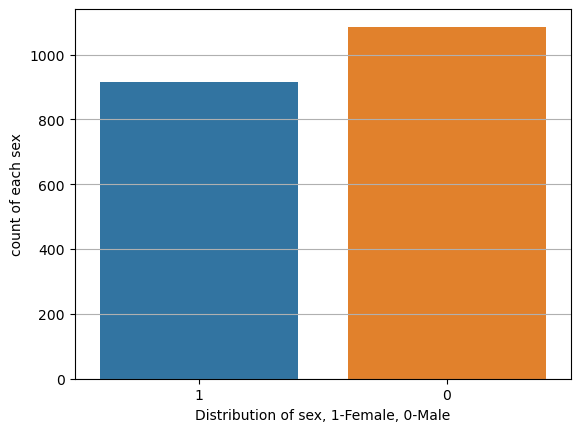

In [199]:
# plotting a countplot
sns.countplot(x=df['Sex'],order=df['Sex'].value_counts().sort_values().index)
plt.grid(axis='y')
plt.xlabel("Distribution of sex, 1-Female, 0-Male")
plt.ylabel("count of each sex")
plt.show()

In [200]:
# sex vise customer count with income > mean income
mean_income=df['Income'].mean()
print("overall mean income is: ",mean_income)
b=df[df['Income']>mean_income]
b
c=b.groupby(['Sex'])['ID'].count()
c

overall mean income is:  120954.419


Sex
0    569
1    303
Name: ID, dtype: int64

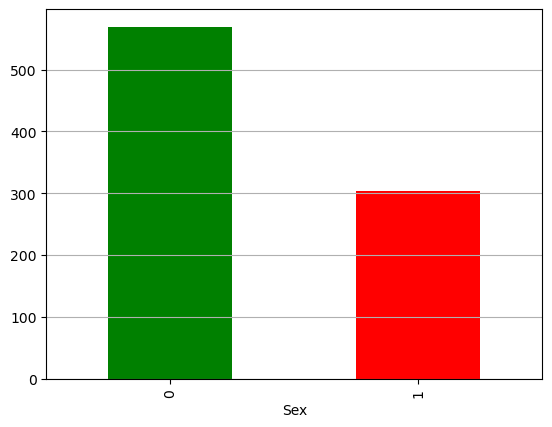

In [201]:
c.plot(kind='bar',color=['green','red'])
plt.grid(axis='y')
plt.show()

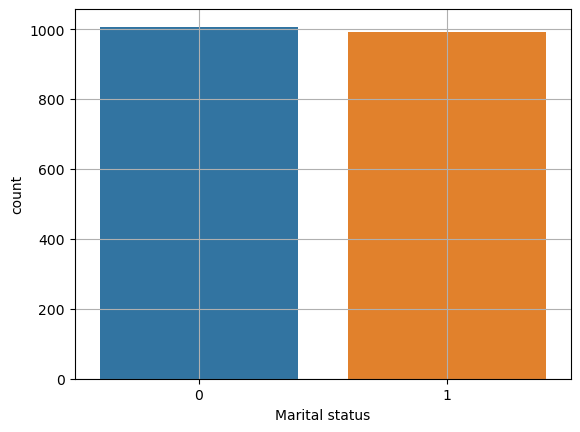

In [202]:
# mariatal status vise customer count
sns.countplot(x=df['Marital status'])
plt.grid()
plt.show()

<Axes: xlabel='Income'>

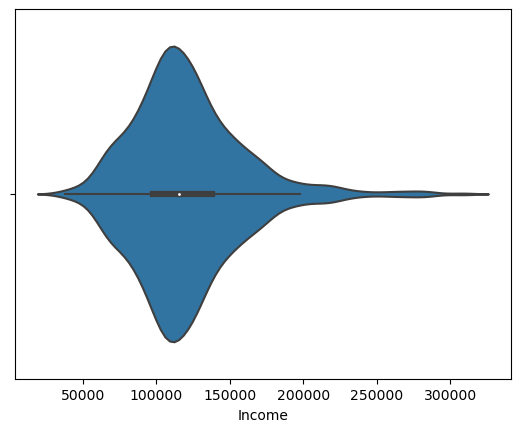

In [203]:
sns.violinplot(x=df['Income'])

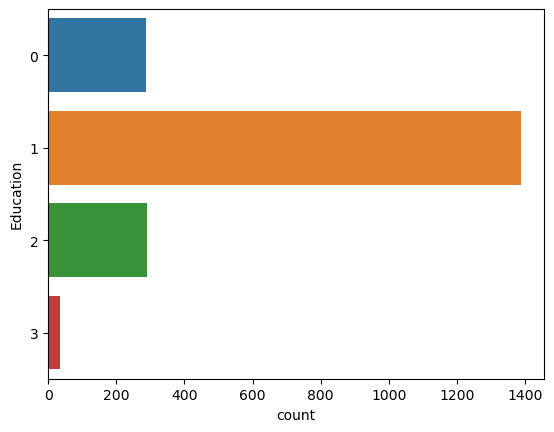

In [204]:
# education level based customer count
sns.countplot(y=df['Education'])
plt.show()

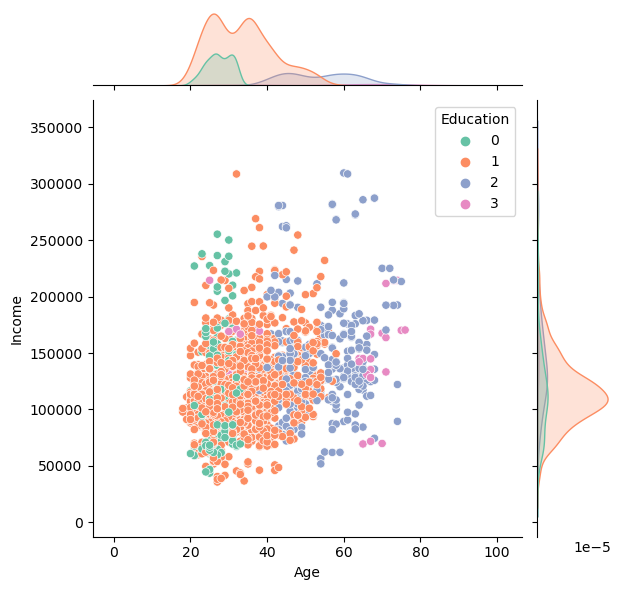

In [205]:
# age and income distribution
sns.jointplot(x=df['Age'],y=df['Income'],hue=df['Education'],palette='Set2')
plt.show()

### CORRELATION

In [206]:
corr=df.corr()
print(type(corr))
corr

<class 'pandas.core.frame.DataFrame'>


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,1.000000,0.328262,0.074403,-0.085246,0.012543,-0.303217,-0.291958,-0.378445
Sex,0.328262,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.074403,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.085246,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.012543,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.303217,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.291958,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.378445,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


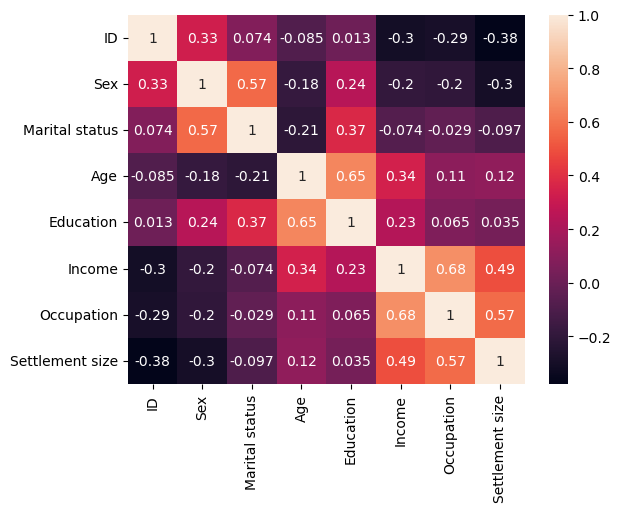

In [207]:
sns.heatmap(corr,annot=True)
plt.show()

#### Education and age are strongly correlated
#### Ocuupation and income are strongly correlated
#### Occupation and Settlement size are moderately correlated

### Outlier Treatment

In [208]:
df.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [209]:
a  = df.iloc[:,1:].describe(percentiles=[0.01,0.03,0.05,0.95,0.97,0.98,0.99]).T
a = a.iloc[:,1:]
a

,mean,std,min,1%,3%,5%,50%,95%,97%,98%,99%,max
Sex,0.4570,0.498272,0.0,0.00,0.0,0.0,0.0,1.0,1.00,1.00,1.0,1.0
Marital status,0.4965,0.500113,0.0,0.00,0.0,0.0,0.0,1.0,1.00,1.00,1.0,1.0
Age,35.9090,11.719402,18.0,20.00,21.0,22.0,33.0,61.0,64.00,66.00,68.0,76.0
Education,1.0380,0.599780,0.0,0.00,0.0,0.0,1.0,2.0,2.00,2.00,3.0,3.0
Income,120954.4190,38108.824679,35832.0,51881.09,63969.3,68248.6,115548.5,190871.2,212059.39,222373.16,260848.3,309364.0
Occupation,0.8105,0.638587,0.0,0.00,0.0,0.0,1.0,2.0,2.00,2.00,2.0,2.0
Settlement size,0.7390,0.812533,0.0,0.00,0.0,0.0,1.0,2.0,2.00,2.00,2.0,2.0


In [210]:
# HANDLING OUTLIERS IN AGE AND INCOME COLUMNS

In [211]:
def outlier_treatment(x):
    x = x.clip(upper= x.quantile(0.99))
    x= x.clip(lower=x.quantile(0.01))
    return x

In [212]:
df[df.columns[1:]] = df[df.columns[1:]].apply(outlier_treatment)

In [213]:
a  = df.iloc[:,1:].describe(percentiles=[0.01,0.03,0.05,0.95,0.97,0.98,0.99]).T
a = a.iloc[:,1:]
a

,mean,std,min,1%,3%,5%,50%,95%,97%,98%,99%,max
Sex,0.4570,0.498272,0.00,0.0000,0.0,0.0,0.0,1.0,1.00,1.00,1.000,1.0
Marital status,0.4965,0.500113,0.00,0.0000,0.0,0.0,0.0,1.0,1.00,1.00,1.000,1.0
Age,35.8715,11.583224,20.00,20.0000,21.0,22.0,33.0,61.0,64.00,66.00,68.000,68.0
Education,1.0380,0.599780,0.00,0.0000,0.0,0.0,1.0,2.0,2.00,2.00,3.000,3.0
Income,120829.8344,37163.662246,51881.09,51881.9909,63969.3,68248.6,115548.5,190871.2,212059.39,222373.16,260847.013,260848.3
Occupation,0.8105,0.638587,0.00,0.0000,0.0,0.0,1.0,2.0,2.00,2.00,2.000,2.0
Settlement size,0.7390,0.812533,0.00,0.0000,0.0,0.0,1.0,2.0,2.00,2.00,2.000,2.0


In [214]:
df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.871500,1.03800,120829.834400,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.583224,0.59978,37163.662246,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,20.000000,0.00000,51881.090000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,68.000000,3.00000,260848.300000,2.000000,2.000000


In [215]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [247]:
# SCALING THE DATA
sc = StandardScaler()
df_sub=df.copy()
for i in df.columns:
    df_sub[i]=sc.fit_transform(df[[i]])
    
df_sub   

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,-1.731185,-0.917399,-0.993024,2.688050,1.604323,0.103357,0.296823,1.552326
1,-1.729453,1.090038,1.007025,-1.197850,-0.063372,0.805912,0.296823,1.552326
2,-1.727721,-0.917399,-0.993024,1.133690,-0.063372,-0.851039,-1.269525,-0.909730
3,-1.725989,-0.917399,-0.993024,0.788276,-0.063372,1.365524,0.296823,0.321298
4,-1.724257,-0.917399,-0.993024,1.479103,-0.063372,0.759027,0.296823,0.321298
...,...,...,...,...,...,...,...,...
1995,1.724257,1.090038,-0.993024,0.960983,-0.063372,0.072540,-1.269525,-0.909730
1996,1.725989,1.090038,1.007025,-0.766084,-0.063372,-0.083054,0.296823,-0.909730
1997,1.727721,-0.917399,-0.993024,-0.420670,-1.731068,-0.926670,-1.269525,-0.909730
1998,1.729453,1.090038,1.007025,-1.025144,-0.063372,-0.615320,-1.269525,-0.909730


In [216]:
df_subset=df[['Age','Income']]
df_subset.head()

,Age,Income
0,67,124670.0
1,22,150773.0
2,49,89210.0
3,45,171565.0
4,53,149031.0


In [217]:
sc.fit(df_subset)
df_sc = sc.transform(df_subset)

In [218]:
print(df_sc.shape)
print(type(df_sc))

(2000, 2)
<class 'numpy.ndarray'>


In [219]:
df.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [220]:
df_sc = pd.DataFrame(df_sc,columns=['Age','Income'])
df_sc.head()

,Age,Income
0,2.688050,0.103357
1,-1.197850,0.805912
2,1.133690,-0.851039
3,0.788276,1.365524
4,1.479103,0.759027


In [221]:
df_sc.describe()

,Age,Income
count,2.000000e+03,2.000000e+03
mean,2.042810e-16,-1.705303e-16
std,1.000250e+00,1.000250e+00
min,-1.370557e+00,-1.855737e+00
25%,-7.660837e-01,-6.235225e-01
50%,-2.479636e-01,-1.421457e-01
75%,5.292165e-01,4.640750e-01
max,2.774403e+00,3.768560e+00


In [222]:
df['Age']=df_sc['Age']
df['Income']=df_sc['Income']
df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2.000000e+03,2000.00000,2.000000e+03,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,2.042810e-16,1.03800,-1.705303e-16,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,1.000250e+00,0.59978,1.000250e+00,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,-1.370557e+00,0.00000,-1.855737e+00,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,-7.660837e-01,1.00000,-6.235225e-01,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,-2.479636e-01,1.00000,-1.421457e-01,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,5.292165e-01,1.00000,4.640750e-01,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,2.774403e+00,3.00000,3.768560e+00,2.000000,2.000000


# Elbow Method- 
To find optimum number of clusters to segmentise customers

In [223]:
from sklearn.cluster import KMeans

In [224]:
# within cluster sum of square
wcss = []
for i in range(1,15):
    model = KMeans(n_clusters=i)
    model.fit(df)
    wcss.append(model.inertia_)
    
# model.inertia_ returns the WCSS values
print('WCSS\n',wcss)

C:\Users\win 8.1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\win 8.1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\win 8.1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\win 8.1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\win 8.1\anaconda3\lib\site-packages\skl

WCSS
 [666674350.3269998, 166674111.8464418, 74083749.09027909, 41675419.75659653, 26686793.660410516, 18531777.57714753, 13621768.267559499, 10434296.95052174, 8246538.266465772, 6675192.455154002, 5534707.317134988, 4639014.877190579, 3959159.013409587, 3421396.5640510535]


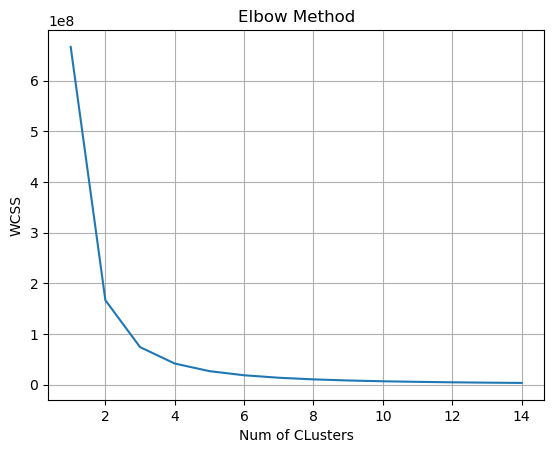

In [225]:
plt.plot(list(range(1,15)),wcss)
plt.title('Elbow Method')
plt.xlabel('Num of CLusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [226]:
# optimum number of clusters can be 2 or 3

# Silhoutte method
- to determine optimum number of cluster using one different approach where we look for minimizing wcss.
- # (b-a)/max(a,b)

In [227]:
from sklearn.metrics import silhouette_score

In [233]:
for i in range(2,10): # i = no of clusters
    m = KMeans(n_clusters=i,random_state=0,init='k-means++').fit(df)
    print(f'Silhoutte Score at K={i}',silhouette_score(df,m.labels_))

C:\Users\win 8.1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhoutte Score at K=2 0.6263465507065786


C:\Users\win 8.1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhoutte Score at K=3 0.5895325393235766


C:\Users\win 8.1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhoutte Score at K=4 0.5710191799697798


C:\Users\win 8.1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhoutte Score at K=5 0.5597293084459359


C:\Users\win 8.1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhoutte Score at K=6 0.552207410726469


C:\Users\win 8.1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhoutte Score at K=7 0.5470089997806427


C:\Users\win 8.1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhoutte Score at K=8 0.542496256362027


C:\Users\win 8.1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhoutte Score at K=9 0.5387787416136611


In [ ]:
# Silhoutte score is maximum at k=2

## Applying KMeans at k=2

In [248]:
kmeans_2 = KMeans(n_clusters=2)
kmeans_2.fit(df_sub)

C:\Users\win 8.1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [249]:
ypred_k2 = kmeans_2.predict(df_sub)
print(ypred_k2)

[1 1 0 ... 0 0 0]


In [250]:
from collections import Counter

In [251]:
c1 = Counter(ypred_k2)
print(c1)

Counter({0: 1025, 1: 975})


In [252]:
cent2 = kmeans_2.cluster_centers_
print(cent2.shape)
print(cent2)

(2, 8)
[[ 0.53396972  0.49524221  0.23507593 -0.27321314 -0.05036895 -0.58342522
  -0.60085034 -0.71535671]
 [-0.56247735 -0.52168225 -0.24762619  0.28779947  0.05305805  0.61457318
   0.63292859  0.75354824]]


In [255]:
df1 = df_sub.copy()

In [256]:
df1['Clusters_2'] = ypred_k2
df1.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Clusters_2
0,-1.731185,-0.917399,-0.993024,2.688050,1.604323,0.103357,0.296823,1.552326,1
1,-1.729453,1.090038,1.007025,-1.197850,-0.063372,0.805912,0.296823,1.552326,1
2,-1.727721,-0.917399,-0.993024,1.133690,-0.063372,-0.851039,-1.269525,-0.909730,0
3,-1.725989,-0.917399,-0.993024,0.788276,-0.063372,1.365524,0.296823,0.321298,1
4,-1.724257,-0.917399,-0.993024,1.479103,-0.063372,0.759027,0.296823,0.321298,1


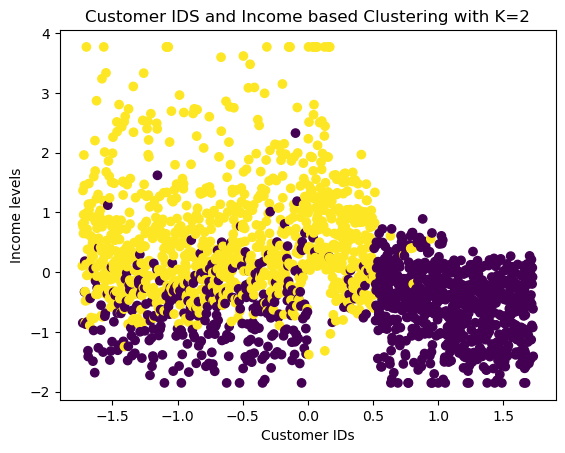

In [257]:
plt.scatter(df1['ID'],df1['Income'],c=ypred_k2)

plt.xlabel('Customer IDs')
plt.ylabel('Income levels')
plt.title('Customer IDS and Income based Clustering with K=2')
plt.show()

### CLuster Profiling

In [262]:
def k_cluster_analysis(k,table):
    model=KMeans(n_clusters=k,random_state=0)
    model.fit(table)
    ypred=model.predict(table)
    print(Counter(ypred))
    cent=model.cluster_centers_
    table[f'Cls{k}']=ypred
    r1=table.drop(f'Cls{k}',axis=1).mean().reset_index().T
    r1.columns=r1.loc['index']
    r1=r1.iloc[1:,]
    r1.index=['Mean']
    r2=table.groupby(f'Cls{k}').mean()
    cls_analysis=pd.concat([r1,r2])
    return cls_analysis


In [263]:
obj=k_cluster_analysis(2,df_sub)
obj

C:\Users\win 8.1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Counter({1: 1025, 0: 975})


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Mean,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0
0,-0.562472,-0.522088,-0.248391,0.289996,0.054649,0.613477,0.630977,0.751842
1,0.535034,0.49662,0.236274,-0.275849,-0.051983,-0.583551,-0.600198,-0.715167
